# Tarea 8 - Sistemas de aprendizaje automático

## 1. Mostrar trayectoria aprendida

Ejecuta el código y modifícalo para que muestre la trayectoria que el agente ha aprendido. Cuántos movimientos necesita para llegar al objetivo?

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import random

# Grid setup
GRID_SIZE = 5
GOLD = (3, 3)
TRAPS = [(2, 3), (3, 2), (2, 2)]
# Accions possibles: amunt, avall , esquerra, dreta
ACTIONS = [(-1,0), (1,0), (0,-1), (0,1)]

In [25]:
# Recompenses
def get_reward(state):
    if state == GOLD:
        return 1
    elif state in TRAPS:
        return -1
    else:
        return -0.01  # petita penalització per afavorir camins curts

def valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action):
    new_state = (state[0] + action[0], state[1] + action[1])
    if valid_state(new_state):
        return new_state
    return state

In [26]:
# Q-learning parameters
Q = {}
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 500

In [27]:
# Entrenament
for _ in range(episodes):
    state = (0, 0)
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            Q[state] = np.zeros(len(ACTIONS))
        if random.random() < epsilon:
            action_idx = random.randint(0, len(ACTIONS) - 1)
        else:
            action_idx = np.argmax(Q[state])
        action = ACTIONS[action_idx]
        new_state = step(state, action)
        reward = get_reward(new_state)
        if new_state not in Q:
            Q[new_state] = np.zeros(len(ACTIONS))
        Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action_idx])
        state = new_state

In [28]:
# Millor trajectòria
def get_best_trajectory(start=(0, 0)):
    path = [start]
    state = start
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            break
        action = ACTIONS[np.argmax(Q[state])]
        next_state = step(state, action)
        if next_state == state or next_state in path:
            break  # avoid loops
        path.append(next_state)
        state = next_state
    return path

trajectory = get_best_trajectory()
print("Trayectoria aprendida por el agente:")
print(trajectory)

Trayectoria aprendida por el agente:
[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 3)]


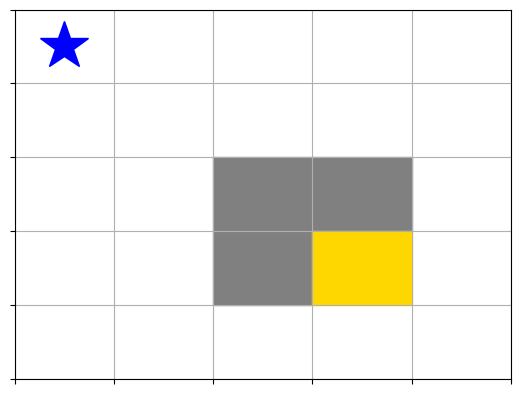

In [30]:
fig, ax = plt.subplots()

def draw_grid(agent_pos, path_so_far):
    ax.clear()
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(-0.5, GRID_SIZE - 0.5)
    ax.set_ylim(-0.5, GRID_SIZE - 0.5)

    # Cel·les
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            y = GRID_SIZE - 1 - i
            if (i, j) == GOLD:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gold'))
            elif (i, j) in TRAPS:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gray'))

    # Añadir un marcador de la ruta recorrida
    for pos in path_so_far:
        y = GRID_SIZE - 1 - pos[0]
        x = pos[1]
        ax.plot(x, y, 'o', color='blue', markersize=10)

    # Agent actual
    y = GRID_SIZE - 1 - agent_pos[0]
    x = agent_pos[1]
    ax.plot(x, y, 'b*', markersize=36)

def update(frame):
    path_so_far = trajectory[:frame]
    current_pos = trajectory[frame]
    draw_grid(current_pos, path_so_far)

anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=700)
HTML(anim.to_jshtml())

## 2. Cambio de obstáctulos

Cambia los obstáculos para que la trayectoria aprendida por el agente sea la siguiente:

```
((0,0),(1,0),(2,0),(3,0),(4,0),(4,1),(4,2),(3,2),(2,2),(1,2),(0,2),(0,3),(0,4),(1,4),(2,4),(3,4),(4,4))
```

In [32]:
# Grid setup
GOLD = (4, 4)
TRAPS = [(0, 1), (1, 1), (2, 1), (3, 1), (1, 3), (2, 3), (3, 3), (4, 3)]

In [33]:
# Recompenses
def get_reward(state):
    if state == GOLD:
        return 1
    elif state in TRAPS:
        return -1
    else:
        return -0.01  # petita penalització per afavorir camins curts

def valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action):
    new_state = (state[0] + action[0], state[1] + action[1])
    if valid_state(new_state):
        return new_state
    return state

In [34]:
# Q-learning parameters
Q = {}
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 500

In [35]:
# Entrenament
for _ in range(episodes):
    state = (0, 0)
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            Q[state] = np.zeros(len(ACTIONS))
        if random.random() < epsilon:
            action_idx = random.randint(0, len(ACTIONS) - 1)
        else:
            action_idx = np.argmax(Q[state])
        action = ACTIONS[action_idx]
        new_state = step(state, action)
        reward = get_reward(new_state)
        if new_state not in Q:
            Q[new_state] = np.zeros(len(ACTIONS))
        Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action_idx])
        state = new_state

# Millor trajectòria
def get_best_trajectory(start=(0, 0)):
    path = [start]
    state = start
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            break
        action = ACTIONS[np.argmax(Q[state])]
        next_state = step(state, action)
        if next_state == state or next_state in path:
            break  # avoid loops
        path.append(next_state)
        state = next_state
    return path

trajectory = get_best_trajectory()
print("Trayectoria aprendida por el agente:")
print(trajectory)

Trayectoria aprendida por el agente:
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


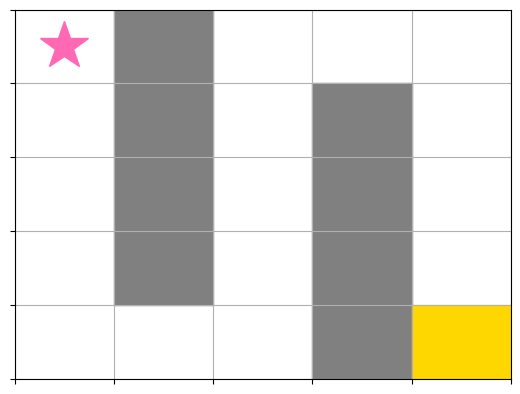

In [36]:
# Animació

fig, ax = plt.subplots()

def draw_grid(agent_pos, path_so_far):
    ax.clear()
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(-0.5, GRID_SIZE - 0.5)
    ax.set_ylim(-0.5, GRID_SIZE - 0.5)

    # Cel.les
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            y = GRID_SIZE - 1 - i
            if (i, j) == GOLD:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gold'))
            elif (i, j) in TRAPS:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gray'))

    # Añadir un marcador de la ruta recorrida
    for pos in path_so_far:
        y = GRID_SIZE - 1 - pos[0]
        x = pos[1]
        ax.plot(x, y, 'o', color='blue', markersize=10)

    # Agent
    y = GRID_SIZE - 1 - agent_pos[0]
    x = agent_pos[1]
    ax.plot(x, y, marker='*', markersize=36, color='hotpink')

def update(frame):
    path_so_far = trajectory[:frame]
    current_pos = trajectory[frame]
    draw_grid(current_pos, path_so_far)

anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=700)
HTML(anim.to_jshtml())

## 3. Reducir epochs de aprendizaje

Reduce el número de epochs de aprendizaje. A partir de qué valor el agente suele aprender a resolver el problema?

In [13]:
# Q-learning parameters
Q = {}
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 250

SOLUCION_CORRECTA = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), GOLD]

In [14]:
# Entrenament
for _ in range(episodes):
    state = (0, 0)
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            Q[state] = np.zeros(len(ACTIONS))
        if random.random() < epsilon:
            action_idx = random.randint(0, len(ACTIONS) - 1)
        else:
            action_idx = np.argmax(Q[state])
        action = ACTIONS[action_idx]
        new_state = step(state, action)
        reward = get_reward(new_state)
        if new_state not in Q:
            Q[new_state] = np.zeros(len(ACTIONS))
        Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action_idx])
        state = new_state

In [15]:
# Millor trajectòria
def get_best_trajectory(start=(0, 0)):
    path = [start]
    state = start
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            break
        action = ACTIONS[np.argmax(Q[state])]
        next_state = step(state, action)
        if next_state == state or next_state in path:
            break  # avoid loops
        path.append(next_state)
        state = next_state
    return path

trajectory = get_best_trajectory()
print("Trayectoria aprendida por el agente:")
print(trajectory)

Trayectoria aprendida por el agente:
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [39]:
N = 10  # Número de repeticiones por valor de episodios, se puede modificar a preferencia de cada uno.

for episodes in range(200, 301, 5):  # Comprobamos desde 200 hasta 300 episodios, de 5 en 5. También se pueden modificar los parámetros.
    successes = 0
    for _ in range(N):
        Q = {}

        # ENTRENAMIENTO
        for _ in range(episodes):
            state = (0, 0)
            while state != GOLD and state not in TRAPS:
                if state not in Q:
                    Q[state] = np.zeros(len(ACTIONS))
                if random.random() < epsilon:
                    action_idx = random.randint(0, len(ACTIONS) - 1)
                else:
                    action_idx = np.argmax(Q[state])
                action = ACTIONS[action_idx]
                new_state = step(state, action)
                reward = get_reward(new_state)
                if new_state not in Q:
                    Q[new_state] = np.zeros(len(ACTIONS))
                Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action_idx])
                state = new_state

        # COMPROBACIÓN DE LA TRAYECTORIA
        trajectory = get_best_trajectory()
        if trajectory == SOLUCION_CORRECTA:
            successes += 1

    print(f"Episodes: {episodes}, Éxitos: {successes}/{N}")

Episodes: 200, Éxitos: 3/10
Episodes: 205, Éxitos: 3/10
Episodes: 210, Éxitos: 1/10
Episodes: 215, Éxitos: 3/10
Episodes: 220, Éxitos: 3/10
Episodes: 225, Éxitos: 4/10
Episodes: 230, Éxitos: 2/10
Episodes: 235, Éxitos: 6/10
Episodes: 240, Éxitos: 5/10
Episodes: 245, Éxitos: 8/10
Episodes: 250, Éxitos: 8/10
Episodes: 255, Éxitos: 9/10
Episodes: 260, Éxitos: 10/10
Episodes: 265, Éxitos: 10/10
Episodes: 270, Éxitos: 10/10
Episodes: 275, Éxitos: 9/10
Episodes: 280, Éxitos: 10/10
Episodes: 285, Éxitos: 10/10
Episodes: 290, Éxitos: 10/10
Episodes: 295, Éxitos: 10/10
Episodes: 300, Éxitos: 10/10


Vemos que el número mínimo de epochs necesarios para conseguir un resultado perfecto serían 280.

A pesar de que en 260, 265, 270 consigue la trayectoría esperada en las 10 ocasiones luego vemos que baja a 9/10 en 275 epochs por lo que no podemos tomar el valor 260 como el mejor. Además he de añadir que he ejecutado el código varias veces y por lo que parece, 280 casi siempre ha sido el número ganador

## 4. Imposible llegar al objetivo

Define un problema en el que sea imposible llegar al objetivo. ¿Qué política aprende el agente en este caso?

In [50]:
# Grid setup
GOLD = (4, 4)
TRAPS = [(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (1, 3), (2, 3), (3, 3), (4, 3)]

In [51]:
# Recompenses
def get_reward(state):
    if state == GOLD:
        return 1
    elif state in TRAPS:
        return -1
    else:
        return -0.01  # petita penalització per afavorir camins curts

def valid_state(state):
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action):
    new_state = (state[0] + action[0], state[1] + action[1])
    if valid_state(new_state):
        return new_state
    return state

In [67]:
# Q-learning parameters
Q = {}
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 500

In [91]:
# Entrenament
for _ in range(episodes):
    state = (0, 0)
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            Q[state] = np.zeros(len(ACTIONS))
        if random.random() < epsilon:
            action_idx = random.randint(0, len(ACTIONS) - 1)
        else:
            action_idx = np.argmax(Q[state])
        action = ACTIONS[action_idx]
        new_state = step(state, action)
        reward = get_reward(new_state)
        if new_state not in Q:
            Q[new_state] = np.zeros(len(ACTIONS))
        Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action_idx])
        state = new_state

# Millor trajectòria
def get_best_trajectory(start=(0, 0)):
    path = [start]
    state = start
    while state != GOLD and state not in TRAPS:
        if state not in Q:
            break
        action = ACTIONS[np.argmax(Q[state])]
        next_state = step(state, action)
        if next_state == state or next_state in path:
            break  # avoid loops
        path.append(next_state)
        state = next_state
    return path

trajectory = get_best_trajectory()
print("Trayectoria aprendida por el agente:")
print(trajectory)

Trayectoria aprendida por el agente:
[(0, 0)]


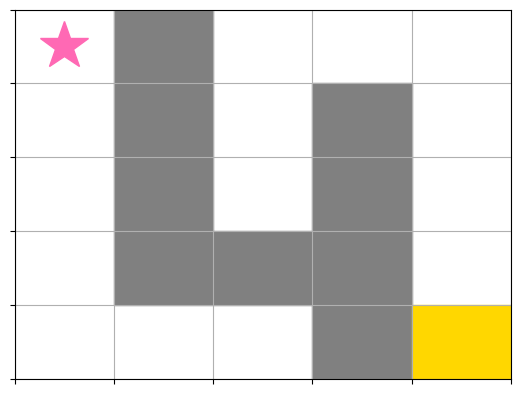

In [92]:
# Animació

fig, ax = plt.subplots()

def draw_grid(agent_pos, path_so_far):
    ax.clear()
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(-0.5, GRID_SIZE - 0.5)
    ax.set_ylim(-0.5, GRID_SIZE - 0.5)

    # Cel.les
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            y = GRID_SIZE - 1 - i
            if (i, j) == GOLD:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gold'))
            elif (i, j) in TRAPS:
                ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gray'))

    # Añadir un marcador de la ruta recorrida
    for pos in path_so_far:
        y = GRID_SIZE - 1 - pos[0]
        x = pos[1]
        ax.plot(x, y, 'o', color='blue', markersize=10)

    # Agent
    y = GRID_SIZE - 1 - agent_pos[0]
    x = agent_pos[1]
    ax.plot(x, y, marker='*', markersize=36, color='hotpink')

def update(frame):
    path_so_far = trajectory[:frame]
    current_pos = trajectory[frame]
    draw_grid(current_pos, path_so_far)

anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=700)
HTML(anim.to_jshtml())

La política que da como resultado el agente es en la gran mayoría de ocasiones "(0, 0)". Solo muy de vez en cuando, después de ejecutar el código de entrenamiento varias veces, he conseguido un resultado como por ejemplo:

```[(0, 0), (1, 0), (2, 0), (3, 0)]```


Claramente esto no soluciona el recorrido llevando al agente al objetivo. Por lo tanto el agente sigue las reglas propuestas correctamente, no sobrepasa en ningún caso los bloques prohibidos incluso si se plantea un caso imposible de solucionar.


## 5. Código mediante prompting

Obtén un código como el del caso práctico mediante ingeniería de prompting. ¿Cuántas iteraciones has necesitado? ¿Has tenido que retocar el código finalmente a mano? Copia tu código en una celda del cuaderno y proporciona también la URL de tu diálogo sobre la herramienta que hayas utilizado.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML
import random

# Parámetros del entorno
GRID_SIZE = 5
GOAL_POS = (4, 1)
# Cambiar obstáculos para que haya dos caminos, uno más corto
OBSTACLES = [
    (1, 1), (1, 2), (1, 3),  # Barrera central parcial
    (2, 3),
    (3, 1), (3, 2), (3, 3)   # Cierre parcial abajo
]
ACTIONS = {
    0: (-1, 0),  # Arriba
    1: (1, 0),   # Abajo
    2: (0, -1),  # Izquierda
    3: (0, 1)    # Derecha
}

START_POS = (0, 0)
q_table = {}

def get_qs(state):
    if state not in q_table:
        q_table[state] = np.zeros(len(ACTIONS))
    return q_table[state]

def is_valid(pos):
    x, y = pos
    return (0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and pos not in OBSTACLES)

def get_reward(pos):
    return 1.0 if pos == GOAL_POS else -0.1

def step(state, action):
    dx, dy = ACTIONS[action]
    next_pos = (state[0] + dx, state[1] + dy)
    if is_valid(next_pos):
        return next_pos
    return state

def choose_action(state, epsilon):
    if random.random() < epsilon:
        return random.choice(list(ACTIONS.keys()))
    return int(np.argmax(get_qs(state)))

def train_q_learning(episodes=500, alpha=0.1, gamma=0.9, epsilon=0.2):
    for _ in range(episodes):
        state = START_POS
        done = False
        while not done:
            action = choose_action(state, epsilon)
            next_state = step(state, action)
            reward = get_reward(next_state)
            best_future_q = np.max(get_qs(next_state))
            q_table[state][action] += alpha * (reward + gamma * best_future_q - q_table[state][action])
            state = next_state
            if state == GOAL_POS:
                done = True

def find_best_path():
    path = [START_POS]
    state = START_POS
    for _ in range(100):
        action = np.argmax(get_qs(state))
        next_state = step(state, action)
        path.append(next_state)
        if next_state == GOAL_POS:
            break
        state = next_state
    return path

def draw_grid_base(ax):
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_xticks(np.arange(0, GRID_SIZE + 1))
    ax.set_yticks(np.arange(0, GRID_SIZE + 1))
    ax.grid(True)

def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    draw_grid_base(ax)

    # Dibujar obstáculos y meta una vez
    static_patches = []
    for obs in OBSTACLES:
        rect = patches.Rectangle((obs[1], GRID_SIZE - 1 - obs[0]), 1, 1, color='gray')
        ax.add_patch(rect)
        static_patches.append(rect)
    gx, gy = GOAL_POS
    goal_patch = patches.Rectangle((gy, GRID_SIZE - 1 - gx), 1, 1, color='gold')
    ax.add_patch(goal_patch)
    static_patches.append(goal_patch)

    agent_patch = None
    trail_patches = []

    def init():
        return static_patches

    def update(frame):
        nonlocal agent_patch, trail_patches

        # Eliminar anteriores
        if agent_patch:
            agent_patch.remove()
        for p in trail_patches:
            p.remove()
        trail_patches.clear()

        # Trazo
        for p in path[:frame + 1]:
            py, px = p
            dot = patches.Circle((px + 0.5, GRID_SIZE - 1 - py + 0.5), 0.1, color='blue')
            ax.add_patch(dot)
            trail_patches.append(dot)

        # Agente
        y, x = path[frame]
        agent_patch = patches.RegularPolygon((x + 0.5, GRID_SIZE - 1 - y + 0.5), numVertices=5, radius=0.3, color='red')
        ax.add_patch(agent_patch)

        return [agent_patch] + trail_patches + static_patches

    ani = animation.FuncAnimation(fig, update, frames=len(path), init_func=init, blit=True, interval=500, repeat=False)
    plt.close()
    return HTML(ani.to_jshtml())

# Ejecutar todo
train_q_learning()
best_path = find_best_path()
animate_path(best_path)

Como vemos en el resultado del GIF, se ha conseguido un código funcional que genera un grid con una casilla dorada y varias grises en el que un agente aprende por medio del refuerzo el camino más corto para llegar al objetivo.

Adjunto aquí el [enlace a la conversación](https://chatgpt.com/share/68052728-3110-8005-a9fe-db40f30c2b60) con chatGPT en la que ha generado el código.

Como se puede ver primero ha decidido usar clases, pero mi objetivo era mantener el código generado por la IA lo más parecido al original, por lo que he tenido que explicar más específicamente las funciones que debía usar, de esta manera las podía tomar como referencia. Viendo los resultados parece que cada vez ha ido mejorando.

Sin embargo el siguiente problema ha venido cuando recibia un error por el objeto "ArtistList", resulta que el chat estaba usando atributos que no pertenecen a ese objeto. Después de depurar poco a poco a decidido dejar de usarlo y ha sido una buena solución.

Una vez hecho esto ya tenía un código completamente funcional incluso con el añadido de ver la trayectoria que sigue el agente. Tras conseguir esto, he optado por mejorar el tema de comprobar realmente si el agente está aprendiendo bien. Por eso le he pedido que modifique los obstáculos para que haya un camino más largo y más corto claramente definidos, pero parece que no ha entendido bien mi petición. A pesar de que ha modificado los obstáculos como he pedido, seguían habiendo dos caminos a la misma distancia, por lo que he decidido modificar la posición de la casilla dorada a mano.

Como conclusión diré que, una vez más vemos como la IA sirve como herramienta pero no como varita mágica. Es necesario tener conocimientos de lo que quieres hacer y sobretodo una idea de cómo lo quieres hacer. Puede ser una muy buena herramienta que entiende rápidamente lo que pides sin embargo es necesario especificar y sobretodo diría que lo más importante es no depender únicamente de los resultados que pueda generar sin una opinión crítica.